Здесь сравниваем результаты модели DRL vs бенчмарк DJI vs базовая модель MPT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
methods = ['benchmark_dji', 'markowitz', 'a2c', 'ppo', 'ddpg']

result_df = pd.DataFrame()

for method in methods:
    
    filepath = 'test_results/'+method+'_return_series.csv'

    # костыли стандартизации
    if method == 'benchmark_dji':
        df_tmp = pd.read_csv(filepath)['daily_return']
    else:
        df_tmp = pd.read_csv(filepath, header=0, names=[method.upper()])

    df_tmp.reset_index(drop=True, inplace=True)

    result_df = pd.concat([result_df, df_tmp], axis=1)

# индекс одного из нормальных df делаем общим
df_tmp = pd.read_csv(filepath, header=0, names=[method.upper()])
result_df.set_index(df_tmp.index, inplace=True)
result_df.index = pd.to_datetime(result_df.index).strftime('%Y-%m-%d')

result_df.columns = list(map(str.upper, methods))
result_df

,BENCHMARK_DJI,MARKOWITZ,A2C,PPO,DDPG
2020-01-02,-0.008103,0.016734,0.000000,0.000000,0.000000
2020-01-09,0.006640,0.035164,0.011874,0.017184,0.031521
2020-01-16,0.018081,0.034409,-0.004593,-0.000155,-0.002980
2020-01-23,-0.012255,-0.005109,-0.009742,-0.003219,0.011820
2020-01-30,-0.025258,0.003479,-0.008684,-0.008916,-0.000875
...,...,...,...,...,...
2022-12-01,0.002765,0.016964,-0.032492,-0.035369,-0.032053
2022-12-08,-0.027873,-0.019433,0.029412,0.032520,0.037438
2022-12-15,-0.016318,-0.022646,-0.009087,-0.015418,-0.023424
2022-12-22,0.008787,-0.004252,-0.007785,-0.012283,-0.012965


In [55]:
df = result_df.cumsum()
df

,BENCHMARK_DJI,MARKOWITZ,A2C,PPO,DDPG
2020-01-02,-0.008103,0.016734,0.000000,0.000000,0.000000
2020-01-09,-0.001463,0.051898,0.011874,0.017184,0.031521
2020-01-16,0.016618,0.086306,0.007281,0.017029,0.028542
2020-01-23,0.004363,0.081197,-0.002461,0.013810,0.040362
2020-01-30,-0.020896,0.084676,-0.011145,0.004894,0.039487
...,...,...,...,...,...
2022-12-01,0.270637,0.620852,0.484768,0.595253,0.782519
2022-12-08,0.242764,0.601418,0.514180,0.627774,0.819957
2022-12-15,0.226445,0.578773,0.505093,0.612356,0.796533
2022-12-22,0.235232,0.574521,0.497308,0.600073,0.783569


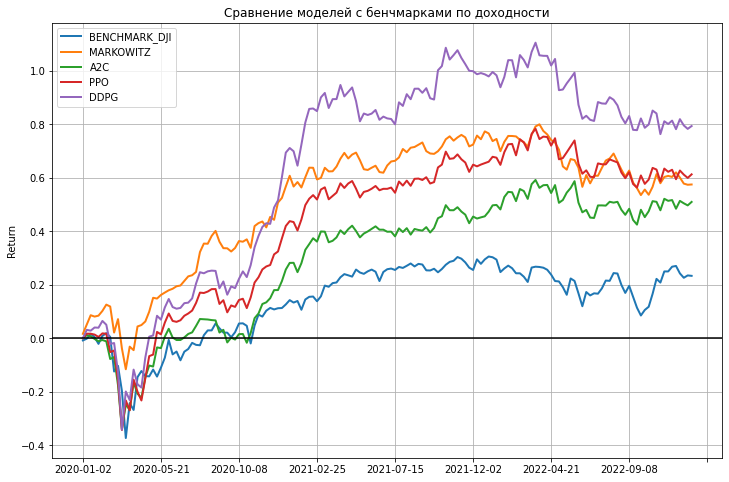

In [75]:
df.plot(linewidth=2, figsize=(12,8))
plt.title('Сравнение моделей с бенчмарками по доходности')
plt.ylabel('Return')
plt.grid()
plt.axhline(y=0, color='black')
plt.show()

In [74]:
print('========== ДОХОДНОСТЬ ==========')
print(df.iloc[-1])

print("\n========== ШАРП ==========")
print(df.iloc[-1] / df.std())

========== ДОХОДНОСТЬ ==========
BENCHMARK_DJI    0.233642
MARKOWITZ        0.575526
A2C              0.510271
PPO              0.613420
DDPG             0.794217
Name: 2022-12-29, dtype: float64

========== ШАРП ==========
BENCHMARK_DJI    1.667758
MARKOWITZ        2.449655
A2C              2.151391
PPO              2.157887
DDPG             2.044667
dtype: float64


### Проверка распределения активов

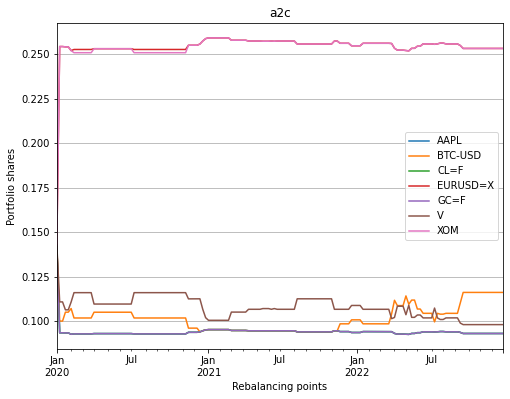

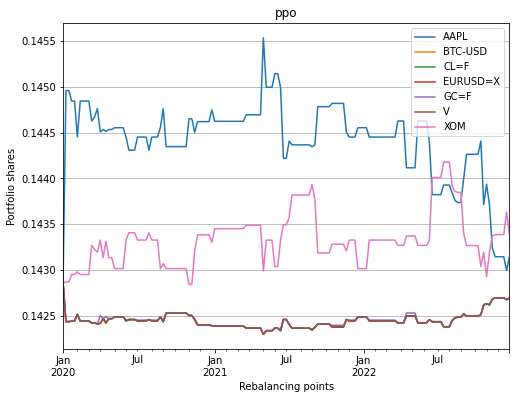

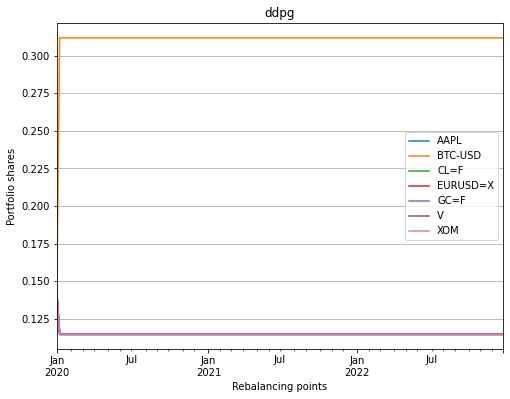

In [29]:
drl_methods = ['a2c', 'ppo', 'ddpg']

for method in drl_methods:
    filepath = 'test_results/'+method+'_actions.csv'
    actions_df = pd.read_csv(filepath)
    actions_df.index = pd.to_datetime(actions_df['date'])
    actions_df.drop(columns=['date'], inplace=True)
    pd.DataFrame(actions_df).plot(figsize=(8,6))
    plt.legend(actions_df.columns)
    plt.grid(axis='y')
    plt.title(method)
    plt.ylabel('Portfolio shares')
    plt.xlabel('Rebalancing points')
    plt.show()

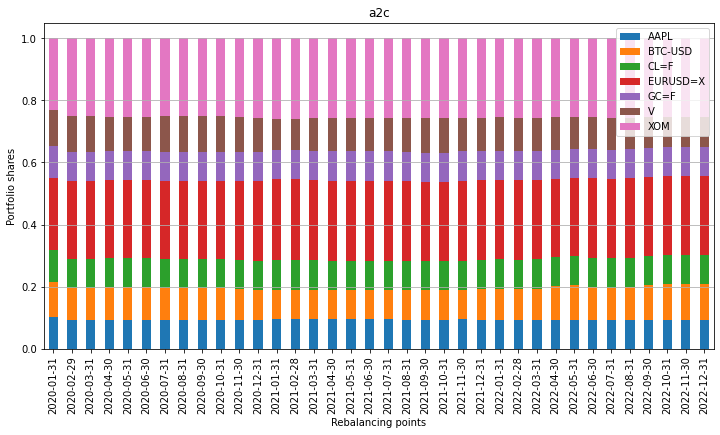

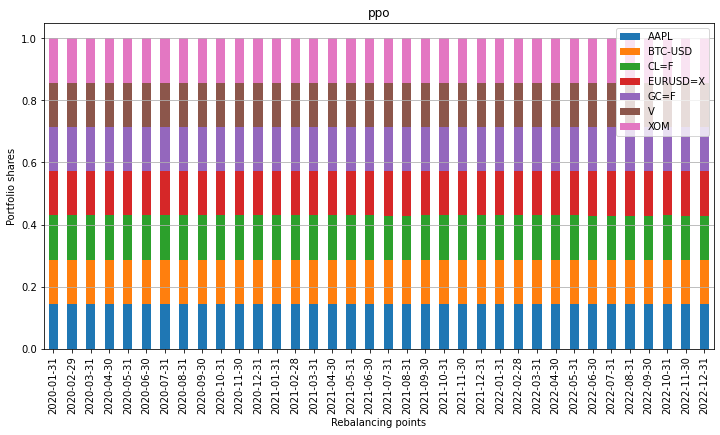

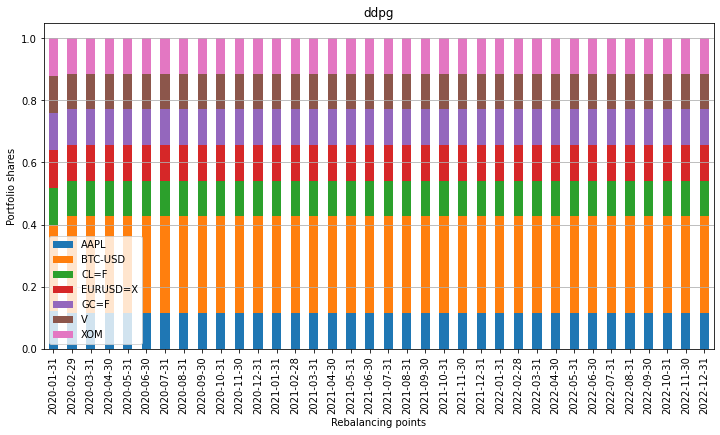

In [34]:
# в барах с ресемплом месячным по среднему
for method in drl_methods:
    filepath = 'test_results/'+method+'_actions.csv'
    actions_df = pd.read_csv(filepath)
    actions_df.index = pd.to_datetime(actions_df['date'])
    actions_df.drop(columns=['date'], inplace=True)
    actions_df = actions_df.resample('M').mean()
    actions_df.index = pd.to_datetime(actions_df.index).strftime('%Y-%m-%d')
    pd.DataFrame(actions_df).plot(kind='bar', stacked=True, figsize=(12,6))
    plt.legend(actions_df.columns)
    plt.grid(axis='y')
    plt.title(method)
    plt.ylabel('Portfolio shares')
    plt.xlabel('Rebalancing points')
    plt.show()